In [19]:
import sys
import os

dir = os.getcwd()

# Loop to move up the directory tree until we find FinModels
while os.path.basename(dir) != 'FinModels':
    dir = os.path.dirname(dir)  # Move up one level


sys.path.append(dir)
# Doda dostop tudi do drugih modelov

In [2]:
from Stock_Generation.StocksGeneration import generate_n_stock_data
from PrepareData import prepare_data
from FitNormalDistribution import fit_normal_distribution
import ShrinkageMethods
from ModelCore import*
from Visualise import*
from ClusteringMethod import*
from ClusteringMethod import*
from BackTesting import*

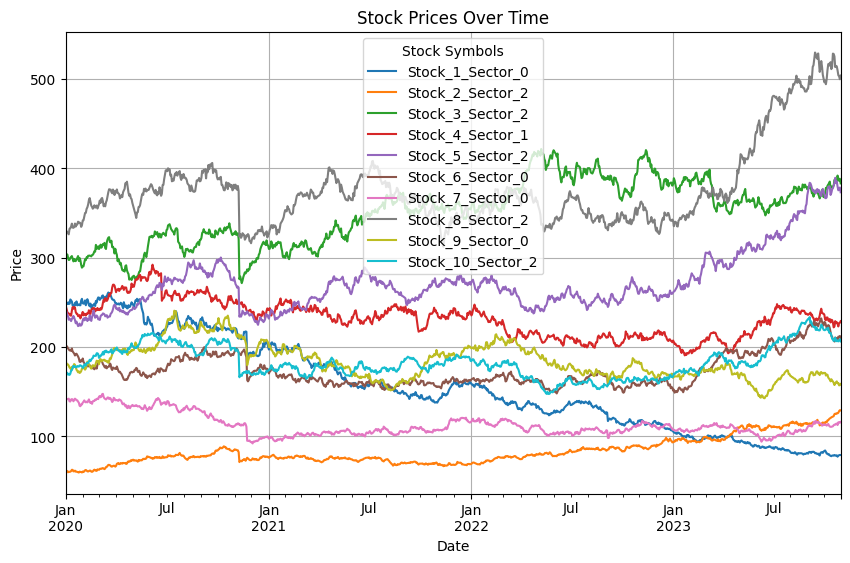

In [3]:
df_prices = generate_n_stock_data(n_stocks=10, n_days=1000, random_seed=2)

visualize_generated_stocks(df_prices=df_prices)

In [5]:
df_weekly_log_returns, df_weekly_prices = prepare_data(df_prices=df_prices)

m, S = fit_normal_distribution(df_weekly_log_returns, df_weekly_prices)

m_js_shr, S_js = ShrinkageMethods.james_stein_estimator(df_weekly_log_returns, df_weekly_prices, horizon=20, tau=1)

m_shr, S_shr = ShrinkageMethods.shrinkage_metod(df_weekly_log_returns, df_weekly_prices, horizon=20, tau=1)

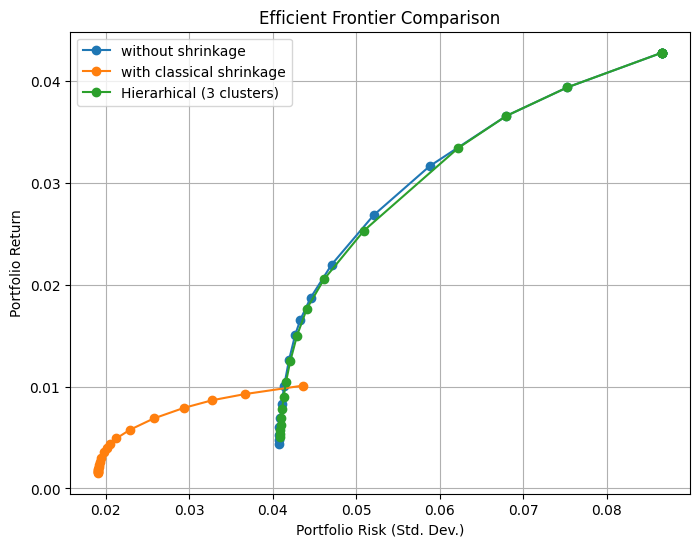

In [6]:
deltas = np.logspace(start=-1, stop=1.5, num=20)[::-1]

df_without_shrinkage = make_df(deltas, model=model_2_13, model_params={"S": S, "m": m, "delta": None})
df_normal_shrinkage = make_df(deltas, model=model_2_13, model_params={"S": S_shr, "m": m_shr, "delta": None})
df_3_clusters = make_df(deltas, model=hierarchical_optimization, 
                        model_params={
    "model": model_2_13, "S": S, "m": m, "delta": None, 
    "num_clusters": 3, "use_abs_corr": True
})


models = [[df_without_shrinkage, "without shrinkage"],
          [df_normal_shrinkage, "with classical shrinkage"], 
          [df_3_clusters, "Hierarhical (3 clusters)"]]

display_results(models)

In [7]:
model_params = {"model": model_2_13, "S": S, "m": m, "delta": 0, "num_clusters": 3, "use_abs_corr": True}
final_ammount, _, _, _ = backtest_markowitz(df_prices, hierarchical_optimization, model_params, window_size=200)
final_ammount

np.float64(0.8849817624984109)

In [10]:
final = backtest_random_portfolios(df_prices, 10000)
final

np.float64(1.1128379895174734)

In [15]:
results_model = []
results_random = []
for i in range(20):
    df_prices = generate_n_stock_data(n_stocks=10, n_days=1000, random_seed=i)
    
    model_params = {"model": model_2_13, "S": S, "m": m, "delta": 0.2, "num_clusters": 3, "use_abs_corr": True}
    final_ammount, _, _, _ = backtest_markowitz(df_prices, hierarchical_optimization, model_params, window_size=200)
    final_ammount
    results_model.append(final_ammount)

    final_random = backtest_random_portfolios(df_prices, 10000)
    results_random.append(final_random)

df = pd.DataFrame({
    "seed": i,
    "model": results_model,
    "random": results_random
})


In [16]:
df

,seed,model,random
0,19,1.148535,0.854079
1,19,0.857743,1.435806
2,19,0.902483,1.113424
3,19,1.299025,1.207531
4,19,0.924157,1.162734
5,19,0.715250,1.088141
6,19,1.273561,1.271893
7,19,1.495015,1.173115
8,19,1.171151,1.221140
9,19,1.051145,1.209810


In [17]:
np.mean(df["model"])

np.float64(1.1617591517451211)

In [18]:
np.mean(df["random"])

np.float64(1.1286467714160777)

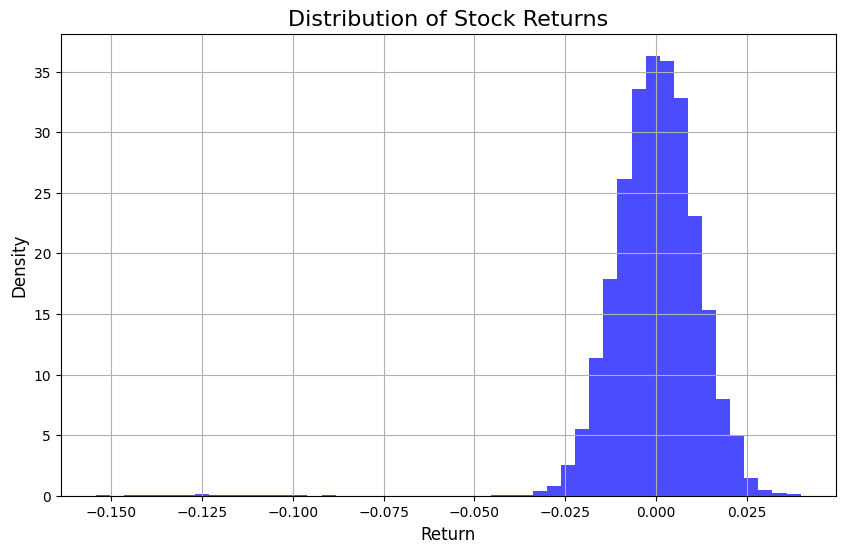

In [23]:

# Assuming df_prices is your DataFrame containing the prices of stocks
# Calculate daily returns (percentage change)
df_returns = df_prices.pct_change().dropna()  # Drop the NaN for the first day

# Plot the distribution of returns
plt.figure(figsize=(10, 6))

# Plot histogram of all returns across all stocks
plt.hist(df_returns.values.flatten(), bins=50, alpha=0.7, color='blue', density=True)

# Title and labels
plt.title("Distribution of Stock Returns", fontsize=16)
plt.xlabel("Return", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()
